<a href="https://colab.research.google.com/github/sandhrabijoy/Time-series/blob/main/FordA_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [2]:
def readucr(filename):
  data = np.loadtxt(filename, delimiter="\t")
  y = data[:,0]
  x = data[:,1:]
  return x, y.astype(int)

root_url="https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train,y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test,y_test = readucr(root_url + "FordA_TEST.tsv")

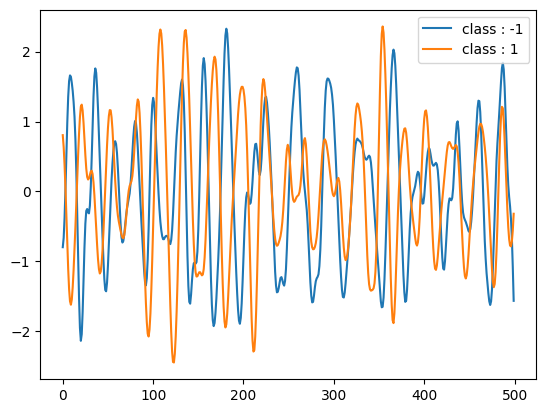

In [4]:
classes = np.unique(np.concatenate((y_train, y_test),axis=0))
plt.figure()
for c in classes:
  c_x_train = x_train[y_train == c]
  plt.plot(c_x_train[0], label= "class : "+str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [5]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))

In [6]:
num_classes = len(np.unique(y_train))

In [8]:
idx = np.random.permutation(len(x_train))
x_train=x_train[idx]
y_train =y_train[idx]

In [9]:
y_train[y_train == -1]=0
y_test[y_test == -1]=0

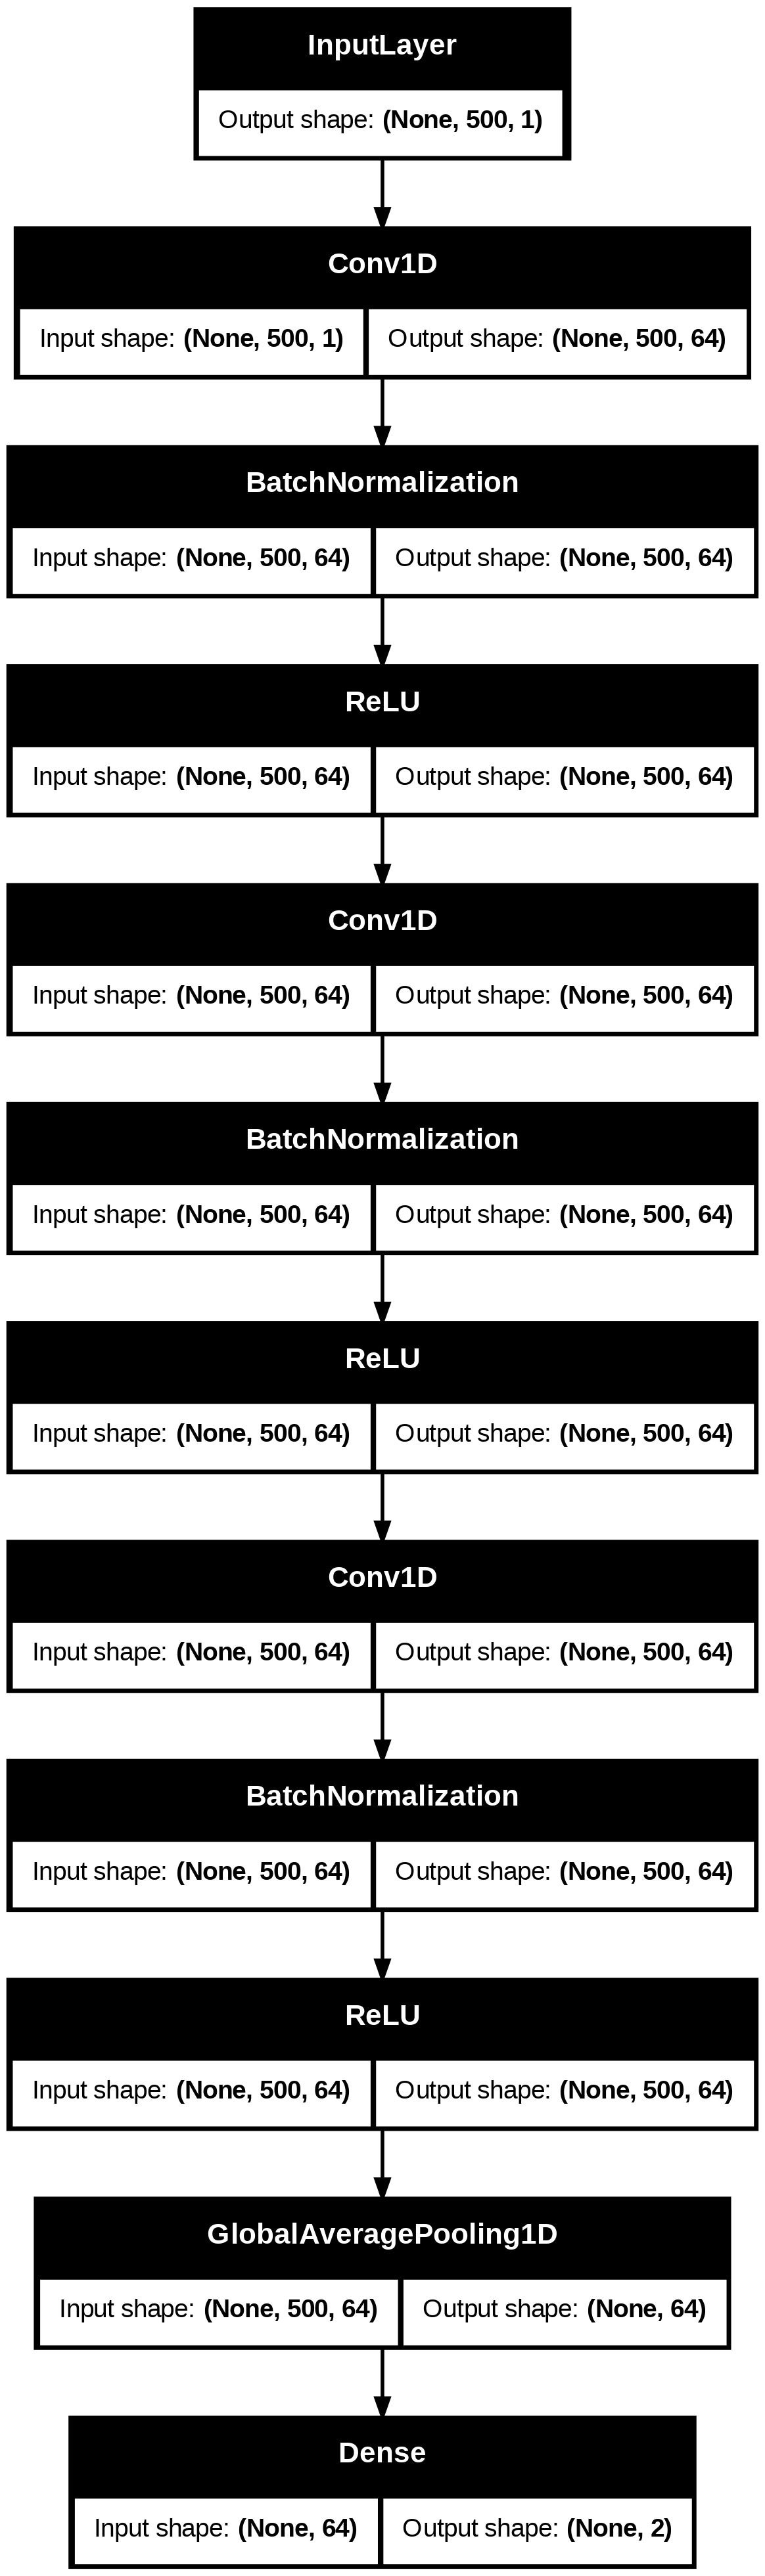

In [12]:
def make_model(input_shape):
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)

  conv2 = keras.layers.Conv1D(filters=64, kernel_size=3 ,padding="same")(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  output_layer = keras.layers.Dense(num_classes, activation= "softmax")(gap)

  return keras.models.Model(inputs=input_layer, outputs= output_layer)

model= make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)


In [13]:
epochs = 500
batch_size = 32

callbacks=[
    keras.callbacks.ModelCheckpoint(
        "best_model.keras",save_best_only=True , monitor ="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss",patience=50, verbose=1)
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1

)

Epoch 1/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - loss: 0.6398 - sparse_categorical_accuracy: 0.6362 - val_loss: 0.7522 - val_sparse_categorical_accuracy: 0.5007 - learning_rate: 0.0010
Epoch 2/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - loss: 0.5000 - sparse_categorical_accuracy: 0.7575 - val_loss: 0.8342 - val_sparse_categorical_accuracy: 0.5007 - learning_rate: 0.0010
Epoch 3/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - loss: 0.4543 - sparse_categorical_accuracy: 0.7711 - val_loss: 0.7763 - val_sparse_categorical_accuracy: 0.5007 - learning_rate: 0.0010
Epoch 4/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - loss: 0.4387 - sparse_categorical_accuracy: 0.7720 - val_loss: 0.8595 - val_sparse_categorical_accuracy: 0.5021 - learning_rate: 0.0010
Epoch 5/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - loss: 0.4370 - sparse_categorical_accuracy: 0.7739 - val_loss: 0.6212 - val_sparse_categorical_accuracy: 0.6158 - learning_rate: 0.0010
Epoch 6/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 2

In [15]:
model = keras.models.load_model("best_model.keras")
test_loss,test_acc = model.evaluate(x_test,y_test)

print("Test accuracy ",test_acc)
print("Test loss" , test_loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0894 - sparse_categorical_accuracy: 0.9697
Test accuracy  0.9704545736312866
Test loss 0.09284128993749619


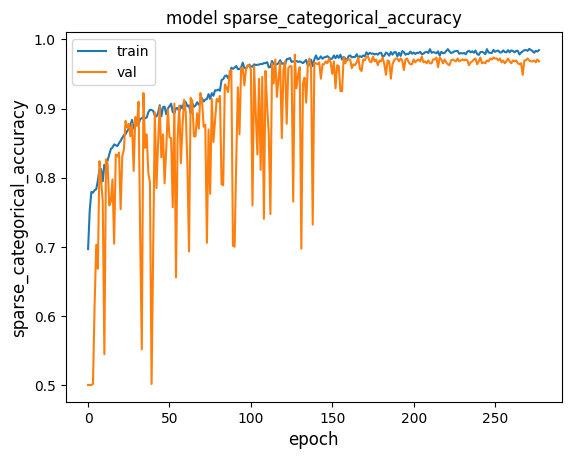

In [16]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_"+ metric])
plt.title("model "+ metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"],loc="best")
plt.show()
plt.close()